# Weather Trends project
##### -- WHLiang , 2019/09/19 

#### First, I found Kawasaki was in the city_list.  I have extract Kawasaki's data from city_data in temperatures database and saved as 'city-Kawasaki.csv'.  
code: `SELECT * FROM city_data WHERE city LIKE 'Kawasaki'`  

#### After I opened 'city-Kawasaki.csv',I found the 'Kawasaki's data is from 1845 to 2013.  So I collect global weather data with the same year period to compare and saved as 'global.csv'.    
code: `SELECT * FROM global_data WHERE year BETWEEN 1845 AND 2013`  
#### I have read the csv file and calculated with Python. I have calculated moving average in 10 years average with rolling() function in pandas. I plot the line chart and I have found 10 year is enough and not too much.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
global_df = pd.read_csv('global.csv')
global_df['move_ave'] = global_df['avg_temp']
global_df['move_ave'] = global_df['move_ave'].rolling(10, min_periods=0,win_type = 'boxcar').mean()
global_df.head()

,year,avg_temp,move_ave
0,1845,7.85,7.850000
1,1846,8.55,8.200000
2,1847,8.09,8.163333
3,1848,7.98,8.117500
4,1849,7.98,8.090000


In [13]:
kawasaki_df = pd.read_csv('city-Kawasaki.csv')
kawasaki_df['move_ave'] = kawasaki_df['avg_temp'] 
kawasaki_df['move_ave'] = kawasaki_df['move_ave'].rolling(10,win_type = 'boxcar',min_periods = 0).mean()
kawasaki_df.head()

,year,city,country,avg_temp,move_ave
0,1845,Kawasaki,Japan,11.95,11.950000
1,1846,Kawasaki,Japan,12.40,12.175000
2,1847,Kawasaki,Japan,12.21,12.186667
3,1848,Kawasaki,Japan,12.14,12.175000
4,1849,Kawasaki,Japan,12.14,12.168000


#### Calculate the difference between Kawasaki and global temperature and calculate moving average with 10 year period.

In [14]:
total_df =pd.DataFrame(global_df)
total_df['kawasaki_avg'] = kawasaki_df['avg_temp']
total_df['kawasaki_move_ave'] = kawasaki_df['move_ave']
total_df['def_temp_avg'] = total_df['kawasaki_avg']-total_df['avg_temp']
total_df['def_move_ave'] = total_df['def_temp_avg']
total_df['def_move_ave'] = total_df['def_move_ave'].rolling(10,min_periods=0,win_type='boxcar').mean()

#### When I create a line chart,my key consideration was put all of three line chart together in one figure.   This helped me to compare easily.   
#### The three line chart includeds: Kawasaki's temperature, global's temperature, difference between Kawasaki's and global's.

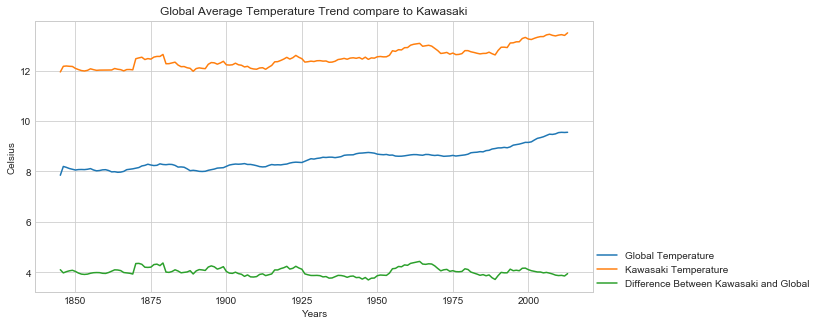

In [15]:
import numpy as np
total_df['global_diff'] = pd.DataFrame(np.diff(total_df['move_ave']))
total_df['kawasaki_diff'] = pd.DataFrame(np.diff(total_df['kawasaki_move_ave']))
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(total_df ['year'], total_df['move_ave'], label='Global Temperature')
ax.plot(total_df ['year'], total_df['kawasaki_move_ave'], label='Kawasaki Temperature')
ax.plot(total_df ['year'], total_df['def_move_ave'], label='Difference Between Kawasaki and Global')
ax.set_title('Global Average Temperature Trend compare to Kawasaki')
ax.set_xlabel('Years')
ax.set_ylabel('Celsius')
ax.legend(loc=(1,0))

#### To see how the temperature is changing, I calculated every years change of global's and Kawasaki's temperature.  I found that Kawasaki's temperature change is more drastic.

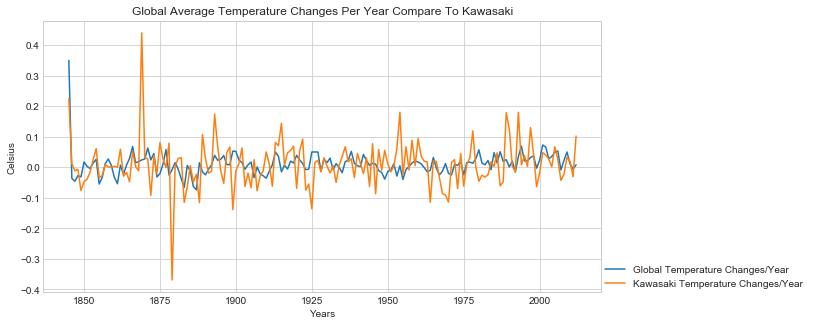

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(total_df ['year'], total_df['global_diff'], label='Global Temperature Changes/Year')
ax.plot(total_df ['year'], total_df['kawasaki_diff'], label='Kawasaki Temperature Changes/Year')
ax.set_title('Global Average Temperature Changes Per Year Compare To Kawasaki')
ax.set_xlabel('Years')
ax.set_ylabel('Celsius')
ax.legend(loc=(1,0))

# Observations:  
#### 1.Global temperature and my City temperature are going hotter.  
#### 2.My City is hotter on average compared to global average, and the difference has been consistent over time.  
#### 3.The changes in my city’s temperatures over time compare to the changes in the global average is more drastic.  
#### 4.The trend of temperature is changed faster in last 100 year, but consistant in every year.  